In [1]:
from sklearn.model_selection import train_test_split  # Importa a função para dividir os dados em conjuntos de treino e teste.
import numpy as np  # Importa o NumPy, uma biblioteca fundamental para trabalhar com arrays e operações matemáticas em Python.
from sklearn.tree import DecisionTreeClassifier  # Importa o classificador de árvore de decisão do Scikit-learn.
import pandas as pd  # Importa o pandas, uma biblioteca para manipulação e análise de dados, especialmente DataFrames.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix  # Importa várias métricas para avaliar o desempenho do modelo.
import matplotlib.pyplot as plt  # Importa o Matplotlib para visualização de dados.
import seaborn as sns  # Importa o Seaborn, que é uma biblioteca para visualizações estatísticas, complementando o Matplotlib.
from sklearn import tree  # Importa o módulo de árvores do Scikit-learn, usado para visualização e manipulação de árvores de decisão.

In [4]:
# Criando um DataFrame com pandas, contendo informações sobre consumo de energia, tempo de operação, tipo de energia e classificação.
data = pd.DataFrame({
    'consumo_energia': [1000, 3000, 1500, 2500, 1200, 3500],  # Consumo de energia em unidades, representando a quantidade de energia utilizada.
    'tempo_op': [200, 500, 300, 400, 250, 600],  # Tempo de operação em algum formato de medida (por exemplo, minutos).
    'energia': ['eletrica', 'gas', 'eletrica', 'gas', 'eletrica', 'gas'],  # Tipo de energia utilizada, podendo ser elétrica ou gás.
    'classif': ['Eficiente', 'Ineficiente', 'Eficiente', 'Ineficiente', 'Eficiente', 'Ineficiente']  # Classificação de cada entrada como 'Eficiente' ou 'Ineficiente', refletindo a eficácia do consumo de energia.
})

# Mapeia os tipos de energia para valores numéricos, onde 'eletrica' é 1 e 'gas' é 0.
data['hist_m'] = data['energia'].map({'eletrica': 1, 'gas': 0})

# Exibe as primeiras linhas do DataFrame para verificação.
data.head()  # Mostra as primeiras cinco linhas do DataFrame, incluindo a nova coluna 'hist_m'.


,consumo_energia,tempo_op,energia,classif,hist_m
0,1000,200,eletrica,Eficiente,1
1,3000,500,gas,Ineficiente,0
2,1500,300,eletrica,Eficiente,1
3,2500,400,gas,Ineficiente,0
4,1200,250,eletrica,Eficiente,1


Acurácia: 1.0
Precisão: 1.0


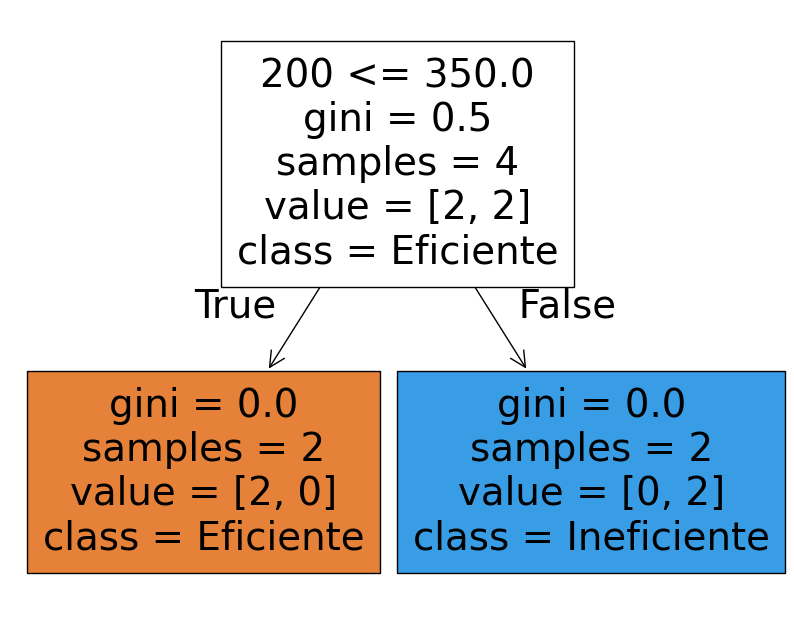

In [8]:
x = np.array(data['tempo_op'])  
y = np.array(data['classif'])  # Extrai a coluna 'classif' do DataFrame e a converte em um array NumPy.

# Divide os dados em conjuntos de treino e teste, usando 20% dos dados para teste.
x_treino, x_teste, y_treino, y_teste = train_test_split(x.reshape(-1, 1), y.reshape(-1, 1), test_size=0.2, random_state=42)

model = DecisionTreeClassifier()  # Cria um modelo de classificador de árvore de decisão.
model.fit(x_treino, y_treino)  # Treina o modelo usando os dados de treino.

prev = model.predict(x_teste)  # Faz previsões sobre o conjunto de teste.
accuracy = accuracy_score(y_teste, prev)  # Calcula a acurácia das previsões.
precisao = precision_score(y_teste, prev, pos_label='Eficiente')  

matrix = confusion_matrix(y_teste, prev)  # Gera a matriz de confusão para as previsões.

# Exibe os resultados de acurácia e precisão.
print(f'Acurácia: {accuracy}')
print(f'Precisão: {precisao}')

# Cria uma visualização da árvore de decisão treinada.
fig = plt.figure(figsize=(10, 8))
tree.plot_tree(model, feature_names=x.tolist(), class_names=y.tolist(), filled=True)
plt.show()  # Mostra o gráfico da árvore de decisão.

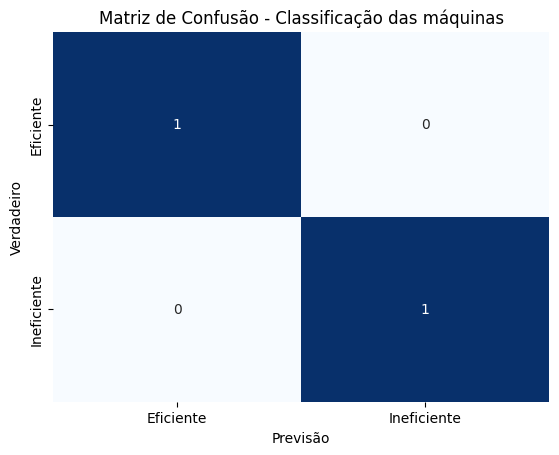

In [10]:
# Cria um heatmap da matriz de confusão usando Seaborn.
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Eficiente', 'Ineficiente'],  # Rótulos do eixo x para as previsões, indicando as classes 'Eficiente' e 'Ineficiente'.
            yticklabels=['Eficiente', 'Ineficiente'])  # Rótulos do eixo y para os valores reais, também indicando as classes 'Eficiente' e 'Ineficiente'.

# Adiciona rótulo ao eixo x.
plt.xlabel('Previsão')  # Define o título do eixo x como 'Previsão'.

# Adiciona rótulo ao eixo y.
plt.ylabel('Verdadeiro')  # Define o título do eixo y como 'Verdadeiro'.

# Adiciona um título ao gráfico.
plt.title('Matriz de Confusão - Classificação das máquinas')  # Define o título do gráfico.

# Exibe o gráfico.
plt.show()  # Mostra o heatmap na tela.
